In [1]:
!pip install -q -U LangGraph

In [2]:
!pip install langsmith

In [3]:
!pip install langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.19
    Uninstalling langchain-core-0.3.19:
      Successfully uninstalled langchain-core-0.3.19
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.7
    Uninstalling langchain-0.3.7:
      Successfully uninstalled langchain-0.3.7


In [4]:
from google.colab import userdata

groq_api_key = userdata.get('GROQ_API_KEY')
groq_api_key
langsmith_api_key = userdata.get('LANGSMITH_API')
langsmith_api_key

'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'

In [5]:
import os
os.environ['LANGSMITH_API_KEY'] = langsmith_api_key
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_PROJECT'] = 'NoviceLangGraph'

In [6]:
from langchain_groq import ChatGroq

llm = ChatGroq(model='llama-3.2-3b-preview', groq_api_key=groq_api_key)

In [7]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [9]:
class State(TypedDict):

  messages:Annotated[list[str], add_messages]



graph_builder = StateGraph(State)

In [11]:
def chatbot(state:State):
  return {"messages":llm.invoke(state["messages"])}

In [14]:
graph_builder.add_node("chatbot", chatbot)

ValueError: Node `chatbot` already present.

In [15]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [17]:
graph = graph_builder.compile()

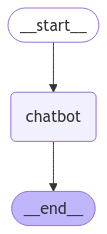

In [18]:
from IPython.display import Markdown,display,Image

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
from rich.console import Console
from rich.markdown import Markdown

# Initialize a Rich console for Markdown rendering
console = Console()

while True:
    user_input = input("User : ")
    if user_input.lower() in ["quit", "q"]:
        print("Goodbye")
        break  # Exit the loop properly after saying goodbye

    # Assuming `graph.stream()` returns a stream of events
    for event in graph.stream({'messages': ("user", user_input)}):
        for value in event.values():
            # Ensure "messages" exists and handle appropriately
            if "messages" in value:
                message = value["messages"]
                if hasattr(message, "content"):  # Check if content attribute exists
                    response_content = message.content
                else:
                    response_content = "No content available"

                # Use Rich's Markdown rendering for the assistant's response
                markdown = Markdown(response_content)
                console.print(markdown)

User : explain me about generative AI 


What is Generative AI?                                                                                             

Generative AI, also known as Generative Model or Generative Algorithm, is a type of artificial intelligence (AI)   
that can generate new, original data that is similar in style, structure, and content to existing data. This is    
achieved by using machine learning algorithms that can learn patterns and relationships in the data, and then use  
this knowledge to create new data that is coherent and meaningful.                                                 

Types of Generative AI                                                                                             

There are several types of generative AI, including:                                                               

 1 Generative Adversarial Networks (GANs): GANs consist of two neural networks that work together to generate new  
   data. One network generates data, while the other network tries to predict whether the generated data is real or
   fake.                                                                                                           
 2 Variational Autoencoders (VAEs): VAEs are a type of neural network that can learn to compress and reconstruct   
   data, and then generate new data that is similar to the original data.                                          
 3 Recurrent Neural Networks (RNNs): RNNs are a type of neural network that can learn to generate sequential data, 
   such as text or speech.                                                                                         
 4 Generative Deep Networks (GANs): GANs are a type of neural network that can learn to generate complex data, such
   as images or videos.                                                                                            

Applications of Generative AI                                                                                      

Generative AI has a wide range of applications, including:                                                         

 1 Image and Video Generation: Generative AI can be used to generate new images and videos that are similar in     
   style and content to existing images and videos.                                                                
 2 Text Generation: Generative AI can be used to generate new text, such as articles, stories, or conversations.   
 3 Music Generation: Generative AI can be used to generate new music that is similar in style and content to       
   existing music.                                                                                                 
 4 Data Augmentation: Generative AI can be used to generate new data that can be used to augment existing datasets,
   such as images or text.                                                                                         
 5 Style Transfer: Generative AI can be used to transfer the style of one image to another, creating a new image   
   that combines the content of the original image with the style of the target image.                             

Benefits of Generative AI                                                                                          

The benefits of Generative AI include:                                                                             

 1 Increased Creativity: Generative AI can generate new and original data that is similar in style and content to  
   existing data.                                                                                                  
 2 Improved Efficiency: Generative AI can automate the process of generating new data, saving time and resources.  
 3 Enhanced Creativity: Generative AI can be used to generate new ideas and concepts that can be used in a variety 
   of applications.                                                                                                

Challenges of Generative AI                  

User : How do the molecular mechanisms of tumor microenvironment (TME) immunosuppression contribute to the resistance of solid tumors to immune checkpoint inhibitors (ICIs), and what potential therapeutic strategies are being explored to overcome this resistance?


The tumor microenvironment (TME) plays a crucial role in immunosuppression, which contributes to the resistance of 
solid tumors to immune checkpoint inhibitors (ICIs). The molecular mechanisms of TME immunosuppression can be      
broadly categorized into two main types: intrinsic and extrinsic.                                                  

Intrinsic immunosuppression occurs within the tumor cells themselves and involves various mechanisms, including:   

 1 Tumor cell-intrinsic immune evasion: Tumor cells can evade immune detection through mechanisms such as antigen  
   presentation, cytokine production, and histone deacetylase (HDAC) inhibition.                                   
 2 Tumor-specific immune suppression: Tumor cells can suppress the development and function of immune cells, such  
   as T cells and macrophages, through the production of immunosuppressive cytokines, like TGF-β and IL-10.        
 3 Epigenetic modifications: Tumor cells can epigenetically modify the expression of immune-related genes, leading 
   to immune suppression.                                                                                          

Extrinsic immunosuppression occurs in the TME and involves various mechanisms, including:                          

 1 Immune suppressive cells: TME contains immune suppressive cells, such as tumor-associated macrophages (TAMs),   
   myeloid-derived suppressor cells (MDSCs), and regulatory T cells (Tregs), which can suppress immune responses.  
 2 Cytokine microenvironment: The TME cytokine microenvironment can promote immune suppression through the         
   production of immunosuppressive cytokines, such as TGF-β, IL-10, and PD-L1.                                     
 3 TME-derived inflammatory mediators: TME-derived inflammatory mediators, such as prostaglandins and leukotrienes,
   can promote immune suppression and tumor progression.                                                           

These intrinsic and extrinsic mechanisms of TME immunosuppression contribute to the resistance of solid tumors to  
ICIs by:                                                                                                           

 1 Inhibiting T cell activation and function: ICIs can be ineffective against tumors that are suppressed by TME    
   immunosuppressive mechanisms, as T cells are unable to be activated or function properly.                       
 2 Increasing PD-L1 expression: ICIs can stimulate PD-L1 expression, but this can be overcome by TME               
   immunosuppressive mechanisms, such as the production of TGF-β and IL-10.                                        
 3 Enhancing cancer stem cell (CSC) survival: ICIs can target CSCs, but TME immunosuppressive mechanisms can       
   promote CSC survival and resistance to ICIs.                                                                    

To overcome TME immunosuppression and improve the efficacy of ICIs, several therapeutic strategies are being       
explored:                                                                                                          

 1 Combination therapy: Combining ICIs with other immunotherapies, such as checkpoint agonists, vaccines, or cancer
   immunomodulators, may enhance anti-tumor immune responses.                                                      
 2 Targeting TME immunosuppressive cells: Antagonizing or depleting immune suppressive cells, such as TAMs or      
   Tregs, may enhance anti-tumor immune responses.                                                                 
 3 Inhibiting TME-derived inflammatory mediators: Targeting TME-derived inflammatory mediators, such as            
   prostaglandins and leukotrienes, may reduce immune suppression and promote anti-tumor immune responses.         
 4 Delivery of immunotherapies directly to the tumor: Direct delivery of immunotherapies to the tumor site may     
   overcome TME immunosuppression and improve an

User : show me a tabular differences between transformer architecture and the mamba architecture 


Here's a table highlighting the main differences between the Transformer architecture and the Mamba architecture:  

                                                                                                                   
  Feature                    Transformer Architecture                    Mamba Architecture                        
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  Model Type                 Self-Attention Mechanism                    Self-Attention Mechanism                  
  Layer Structure            Encoder-Decoder with Multi-Head Attention   Encoder-Decoder with Multi-Head           
                                                                         Attention                                 
  Self-Attention Mechanism   Custom implementation                       Modulated Multi-Head Attention            
  Attention Weights          Learned Softmax Attention Weights           Learned Softmax Attention Weights         
  Parallelization            Scales linearly with input sequence         Scales linearly with input sequence       
                             length                                      length                                    
  Computational Cost         Computes $\mathcal{O}(N^2)$ matrix          Computes $\mathcal{O}(N^2)$ matrix        
                             multiplication                              multiplication                            
  Input/Output               Input: Variable-length sequences, Output:   Input: Variable-length sequences,         
                             Variable-length sequences                   Output: Variable-length sequences         
  Training Requirements      No prior knowledge of sequence              No prior knowledge of sequence            
                             dependencies                                dependencies                              
  Variations                 BERT, RoBERTa, DistilBERT                   Mamba-1, Mamba-2, Mamba-3                 
                                                                                                                   

However, I do not know what Mamba Architecture refers to, I assume it is referring to 'MAMBA' (Multi-Attention     
Mechanism for BERT and its variants).                                                                              

Here's an alternative table:                                                                                       

                                                                                                                   
  Feature                    Transformer Architecture                    MAMBA Architecture                        
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  Model Type                 Self-Attention Mechanism                    Multi-Attention Mechanism                 
  Layer Structure            Encoder-Decoder with Multi-Head Attention   Multi-Head Attention                      
  Self-Attention Mechanism   Custom implementation                       Multi-Head Attention with Improved        
                                                                         Efficiency                                
  Attention Weights          Learned Softmax Attention Weights           Learned Softmax Attention Weights         
  Parallelization            Scales linearly with input sequence         Scales linearly with input sequence       
                             length                                      length                                    
  Computational Cost         Computes $\mathcal{O}(N^2)$ matrix          Computes $\mathcal{O}(N^2)$ matrix        
                             multiplication                              multiplication                            
  Input/Output               Input: Variable-length 